In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../")

In [2]:
from steric_free_simulator import Optimizer
from steric_free_simulator import ReactionNetwork

/home/spencerloggia/Projects/biphy/multi_assembly/steric_free_simulator/energy_space_explorer.py:8: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.protocols.relax import *


<h2> Load basic dimer info </h2>
Specifies reaction A + B <--> AB, with starting with 2000 copies of A and 1000 copies of B

In [3]:
base_input = './input_files/dimer.bngl'
rn = ReactionNetwork(base_input, one_step=True)


Since this is a toy model, assign some random $\Delta G$ to the reaction.

In [35]:
rn.initialize_random_energy(percent_negative=-.5, score_range=30)
rn.reset()
rn.intialize_activations()


<h2>Create an optimizer object to attempt to optimize this reaction network</h2>
Since we are running vectorized simulations here, the reaction network will be transformed into a matrix representation.

**Optimization and Simulation Parameters**:

- **sim_runtime**: time (in seconds) that the simulation will run for.
- **optim_iterations**: number of simlations to run, optimizing parameters at each one.
- **learning rate**: factor to multiply calculated gradients by.
- **score_constant**: A coefficient applied to each rosetta calculated score, can be thought of a converting rosseta units to Joules. Since we have no idea what this really should be, it should be set to make $\Delta G$ for each reaction realistic.
- **freq_factor**: pre-exponential factor when calculating rate constants, physically a measure of the frequency of collisions between molecules.
- **volume**: The volume of each simulation, used when calculating concentraions from copy numbers
- **device**: The hardware device to run simulations and optimizations on.

If the parameter is not specified at optimizer construction, it is given a default value.

In [36]:
# I am using an adam optimizer, which will chhose the best
# learning rate and momentum parameters as the simulations run,
# So the initial choice of learning rate doesn't matter that much

optim = Optimizer(reaction_network=rn,
                  sim_runtime=.02,
                  optim_iterations=10,
                  learning_rate=.1,
                  sim_mode='vectorized',
                  score_constant=1.)

Using CPU


In [37]:
vec_rn = optim.optimize()

Using CPU
yield on sim iteration 0 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 2 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 3 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 4 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 5 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 6 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 7 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 8 was 73.8%
param update: tensor([0.], dtype=torch.float64)
Using CPU
yield on sim iteration 9 was 73.8%
optimization complete


<h3> Plot the simulation at the first iteration (before optimization) </h3>

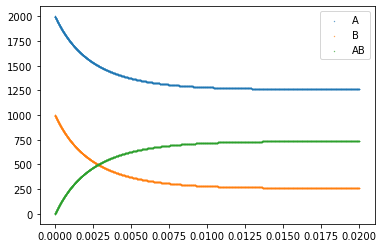

In [38]:
optim.plot_observable(iteration=0)


<h3> Plot the simulation at the last iteration (after all optimization) </h3>

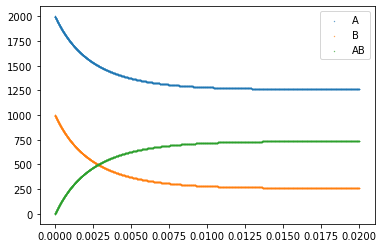

In [39]:
optim.plot_observable(iteration=-1)


<h3> Plot the yield curve over all iterations </h3>

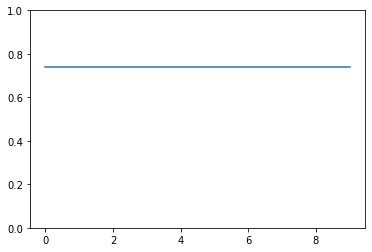

In [40]:
optim.plot_yield()

<h3> Summary of dimer test</h3>
The dimer model, with randomly asssigned reaction free energies, reaches the same equilbrium regardless of the parameters.

<h2> Load basic Trimer info </h2>
Specifies reactions

 - A + B <--> AB
 - B + C <--> BC
 - A + C <--> AC
 - AB + C <--> ABC
 - BC + A <--> ABC
 - AC + B <--> ABC

With starting copy numbers of:

 - A: 1000
 - B: 1000
 - C: 1000

In [3]:
base_input = './input_files/trimer.bngl'
rn = ReactionNetwork(base_input, one_step=True)

Since this is a toy model, assign some random $\Delta Gs$ to each reaction.

In [13]:
# rn.initialize_random_energy(percent_negative=.5, score_range=100)
for edge in rn.network.edges():
    rn.network.edges[edge]['rxn_score'] = 10
rn.reset()
rn.is_energy_set = True

<h2>Create an optimizer object to attempt to optimize this reaction network</h2>

In [14]:
rn.intialize_activations()
optim = Optimizer(reaction_network=rn,
                  sim_runtime=1,
                  optim_iterations=200,
                  learning_rate=.1,
                  sim_mode='vectorized')

Using CPU


In [15]:
vec_rn = optim.optimize()


Using CPU
yield on sim iteration 0 was 67.2%
param update: tensor([-0.1000, -0.1000, -0.1000,  0.1000,  0.1000,  0.1000],
       dtype=torch.float64)
Using CPU
yield on sim iteration 1 was 67.8%


KeyboardInterrupt: 

<h3> Plot the simulation at the first iteration (before optimization) </h3>

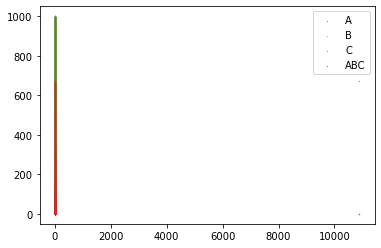

In [12]:
optim.plot_observable(iteration=0)

<h3> Plot the simulation at the last iteration (after all optimization) </h3>

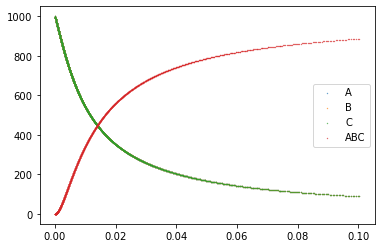

In [83]:
optim.plot_observable(iteration=-1)

<h3> Plot the yield curve over all iterations </h3>

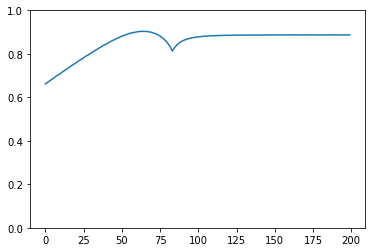

In [84]:
optim.plot_yield()

<h3> Summary of Trimer test</h3>
The trimer model, with randomly asssigned reaction free energies, reaches the same equilbrium regardless of the parameters.


<h2> AP2 Optimization </h2>
See the ap2_optimization ipython notebook in this repo
